# Informe Práctica 1:

## Descripción de cada atributo:

1. **age**: Esta columna tiene 250 valores no nulos de tipo float64. La edad puede ser un factor importante en muchos análisis, por lo que podría ser útil mantenerla. Sin embargo, hay algunos valores faltantes que podrían necesitar ser manejados.

2. **bp**: Esta columna tiene 248 valores no nulos de tipo float64. La presión arterial (bp) también puede ser relevante en muchos análisis médicos. Al igual que con la edad, hay algunos valores faltantes.

3. **sg**: Esta columna tiene 232 valores no nulos de tipo float64. Sin conocer el contexto específico, es difícil decir cuán útil podría ser esta columna.

4. **al**: Esta columna tiene 231 valores no nulos de tipo float64. Al igual que con 'sg', la utilidad de esta columna dependerá del contexto específico de tu análisis.

5. **su**: Esta columna tiene 231 valores no nulos de tipo float64. Al igual que con 'al' y 'sg', la utilidad de esta columna dependerá del contexto específico de tu análisis.

6. **rbc**: Esta columna tiene 164 valores no nulos de tipo object. Esta columna parece ser categórica y podría necesitar ser codificada si planeas usarla para el modelado. Hay una cantidad significativa de valores faltantes que necesitarán ser manejados.

7. **pc**: Esta columna tiene 224 valores no nulos de tipo object. Al igual que con 'rbc', esta columna parece ser categórica.

8. **pcc**: Esta columna tiene 253 valores no nulos de tipo object. Al igual que con 'rbc' y 'pc', esta columna parece ser categórica.

9. **ba**: Esta columna tiene 253 valores no nulos de tipo object. Al igual que con 'rbc', 'pc' y 'pcc', esta columna parece ser categórica.

10. **bgr**: Esta columna tiene 229 valores no nulos de tipo float64. Sin conocer el contexto específico, es difícil decir cuán útil podría ser esta columna.

11. **bu**: Esta columna tiene 241 valores no nulos de tipo float64. Al igual que con 'bgr', la utilidad de esta columna dependerá del contexto específico de tu análisis.

12. **sc**: Esta columna tiene 243 valores no nulos de tipo float64. Al igual que con 'bgr' y 'bu', la utilidad de esta columna dependerá del contexto específico de tu análisis.

13. **sod**: Esta columna tiene 203 valores no nulos de tipo float64. Al igual que con 'bgr', 'bu' y 'sc', la utilidad de esta columna dependerá del contexto específico de tu análisis.

14. **pot**: Esta columna tiene 202 valores no nulos de tipo float64. Al igual que con las columnas anteriores, la utilidad de esta columna dependerá del contexto específico de tu análisis.

15. **hemo**: Esta columna tiene 227 valores no nulos de tipo float64. Al igual que con las columnas anteriores, la utilidad de esta columna dependerá del contexto específico de tu análisis.

16. **pcv**: Esta columna tiene 216 valores no nulos de tipo float64. Al igual que con las columnas anteriores, la utilidad de esta columna dependerá del contexto específico de tu análisis.

17. **wbcc**: Esta columna tiene 196 valores no nulos de tipo float64. Al igual que con las columnas anteriores, la utilidad de esta columna dependerá del contexto específico de tu análisis.

18. **rbcc**: Esta columna tiene 176 valores no nulos de tipo float64. Al igual que con las columnas anteriores, la utilidad de esta columna dependerá del contexto específico de tu análisis.

19. **htn**: Esta columna tiene 254 valores no nulos de tipo object. Al igual que con 'rbc', 'pc', 'pcc' y 'ba', esta columna parece ser categórica.

20. **dm**: Esta columna tiene 254 valores no nulos de tipo object. Al igual que con las columnas categóricas anteriores, esta columna parece ser categórica.

21. **cad**: Esta columna tiene 254 valores no nulos de tipo object. Al igual que con las columnas categóricas anteriores, esta columna parece ser categórica.

22. **appet**: Esta columna tiene 255 valores no nulos de tipo object. Al igual que con las columnas categóricas anteriores, esta columna parece ser categórica.

23. **pe**: Esta columna tiene 255 valores no nulos de tipo object. Al igual que con las columnas categóricas anteriores, esta columna parece ser categórica.

24. **ane**: Esta columna tiene 255 valores no nulos de tipo object. Al igual que con las columnas categóricas anteriores, esta columna parece ser categórica.



# Paso a paso:

In [136]:
# Descargar las librerías:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import linear_model


from sklearn.metrics import roc_curve, auc, confusion_matrix


In [137]:
# Guardar los datos en variables:
X_data = pd.read_csv('C:/Users/Diego/OneDrive - Universidad Rey Juan Carlos/Documentos/GIA_URJC/Curso 2023-24/G.-IA/Curso_2/Cuatri_2/AprendizajeAutomatico_1/Practicas/Practica_1/Datos/trainX_reto1.csv', sep=';', decimal='.', index_col=0, na_values='?')
y_data = pd.read_csv('C:/Users/Diego/OneDrive - Universidad Rey Juan Carlos/Documentos/GIA_URJC/Curso 2023-24/G.-IA/Curso_2/Cuatri_2/AprendizajeAutomatico_1/Practicas/Practica_1/Datos/trainY_reto1.csv', sep=';', decimal='.', index_col=0, na_values='?')

In [138]:
# Separación en train y test:
X_train, X_test = train_test_split(X_data, test_size= 0.20, random_state= 8)
y_train, y_test = train_test_split(y_data, test_size= 0.20, random_state= 8)


In [139]:
# Ordenar los df por id:
X_train.sort_index(inplace=True)
y_train.sort_index(inplace=True)


In [140]:
# Exploración de los datos (X_train):
print(X_train.info())   #-- Tamaño, tipo de datos y valores NaN por atributo
print('\nModas: ', X_train.mode(axis=0, dropna=False))  #-- Moda(s) de cada atributo
print(X_train.describe())   #-- Descripción estadística de cada atributo
N_x, D_x = X_train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 398
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     250 non-null    float64
 1   bp      248 non-null    float64
 2   sg      232 non-null    float64
 3   al      231 non-null    float64
 4   su      231 non-null    float64
 5   rbc     164 non-null    object 
 6   pc      224 non-null    object 
 7   pcc     253 non-null    object 
 8   ba      253 non-null    object 
 9   bgr     229 non-null    float64
 10  bu      241 non-null    float64
 11  sc      243 non-null    float64
 12  sod     203 non-null    float64
 13  pot     202 non-null    float64
 14  hemo    227 non-null    float64
 15  pcv     216 non-null    float64
 16  wbcc    196 non-null    float64
 17  rbcc    176 non-null    float64
 18  htn     254 non-null    object 
 19  dm      254 non-null    object 
 20  cad     254 non-null    object 
 21  appet   255 non-null    object 
 22  pe

In [141]:
# Exploración de los datos (y_train):
print(y_train['class'].unique(),'\n')   # Visualización de los diferentes valores
print(y_train.info())                   # Tamaño, tipo de datos y valores NaN por atributo
print(y_train.describe())               # Descripción estadística de cada atributo
N_y, D_y = y_train.shape

['ckd' 'notckd'] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 398
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   256 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB
None
       class
count    256
unique     2
top      ckd
freq     155


In [142]:
# Codificación de los datos tipo 'object':
def encode_object_columns(df):
    df_code = df.copy()
    code_to_categ = {}

    for col in df_code.columns:
        if df_code[col].dtype == 'object':
            df_code[col] = df_code[col].astype('category')
            codes = df_code[col].cat.codes.replace(-1, np.nan)  # Reemplaza -1 por NaN
            code_to_categ[col] = dict(zip(codes, df_code[col]))
            df_code[col] = codes

    return df_code, code_to_categ

X_df, code_to_categ_X = encode_object_columns(X_train)

#Codificación de los valores de y_train:
y_df, code_to_categ_y = encode_object_columns(y_train)


In [143]:
# Visualización de valores NaN:
missing_data = X_df.isna()

missing_values_per_column = missing_data.sum(axis=0)    # 'NA' por cada columna
missing_values_per_row = missing_data.sum(axis=1)       # 'NA' por cada fila

mask_mayorq0 = missing_values_per_column > 0            # Crea una máscara de Pandas para indicar si hay columnas con NA
mask_mayorq1 = missing_values_per_row > 0               # Crea una máscara de Pandas para indicar si hay filas con NA

print(f'Columnas con valores nulos:\n{missing_values_per_column[mask_mayorq0]}\n')
print(f'Filas con valores nulos:\n{missing_values_per_row[mask_mayorq1]}\n')

missing_count_row = missing_values_per_row.value_counts().sort_index()
print(f'Valores NaN en cada fila:\n{missing_count_row}')
missing_count_col = missing_values_per_column.value_counts().sort_index()
print(f'Valores NaN en cada columna:\n{missing_count_col}')

Columnas con valores nulos:
age       6
bp        8
sg       24
al       25
su       25
rbc      92
pc       32
pcc       3
ba        3
bgr      27
bu       15
sc       13
sod      53
pot      54
hemo     29
pcv      40
wbcc     60
rbcc     80
htn       2
dm        2
cad       2
appet     1
pe        1
ane       1
dtype: int64

Filas con valores nulos:
0      3
1      5
2      3
4      2
6      3
      ..
350    2
363    2
365    2
378    2
381    2
Length: 151, dtype: int64

Valores NaN en cada fila:
0     105
1      30
2      24
3      23
4      21
5      21
6       7
7       7
8       3
9       7
10      4
11      4
dtype: int64
Valores NaN en cada columna:
1     3
2     3
3     2
6     1
8     1
13    1
15    1
24    1
25    2
27    1
29    1
32    1
40    1
53    1
54    1
60    1
80    1
92    1
dtype: int64


In [144]:
# Imputación multivariante de los datos NaN:
imputer = IterativeImputer()
train_imputed = imputer.fit_transform(X_df)
X_train_df = pd.DataFrame(train_imputed, columns=X_df.columns)              # Convertir de nuevo a DataFrame
print(X_train_df.isna().sum())                                              # Comprobamos que no quedan valores NaN


age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64


In [145]:
# Crearemos varias copias de los datos para probar diferentes técnicas:
# Aumento de la dimensionalidad:
degree = 2
interaction_only = True    # Si es 'True' sólo calcula las interacciones entre coumnas diferentes

polyf = PolynomialFeatures(degree= degree, interaction_only= interaction_only)
polyf.set_output(transform= "pandas")

polyf.fit(X_train_df)                       # NO EJECUTAR ESTA LÍNEA CON EL TEST NUNCA. Ya que es el comando de aprendizaje.
X_train_dim = polyf.transform(X_train_df)   # Adapta todos los datos a las nuevas características

# Esclalado al intervalo unidad [0, 1]:
train_df_scalerUnit = MinMaxScaler()    #.ser_output(transform="pandas")
train_df_scalerUnit.fit(X_train_dim)    # Almacena el mín y máx de cada columna
X_train_dim_scalerUnit = train_df_scalerUnit.transform(X_train_dim)

# Escalado al máximo de los valores absolutos:
train_df_scalerMaxAbs = MaxAbsScaler()  #.ser_output(transform= "pandas")
train_df_scalerMaxAbs.fit(X_train_dim)  # Almacena el valor max de cada columna
X_train_dim_scalerMaxAbs = train_df_scalerMaxAbs.transform(X_train_dim)

# Estandarización:
train_df_scalerStd = StandardScaler()   #.ser_output(transform= "pandas")
train_df_scalerStd.fit(X_train_dim)     # Estandariza los datos para que la media sea 0 y la desviación típica 1 (o valores aprox)
X_train_dim_scalerStd = train_df_scalerStd.transform(X_train_dim)

# Filtrado por Varianza:
selector_var = VarianceThreshold(threshold=0.1)     # 'threshold=0.1' indica el mínimo valor que debe tener la varianza
selector_var.set_output(transform='pandas')

selector_var.fit(X_train_dim)
X_train_var_filtered = selector_var.transform(X_train_dim)

print('Tamaño del df original: ', X_train_dim.shape)
print('Tamaño del df filtrado: ', X_train_var_filtered.shape)

# repetimos el ejemplo pero escalando al intervalo unidad antes del filtrado
selector_scalerUnit = VarianceThreshold(threshold=0.1)     # 'threshold=0.1' indica el mínimo valor que debe tener la varianza
selector_scalerUnit.set_output(transform='pandas')

selector_scalerUnit.fit(X_train_dim_scalerUnit)
X_train_scalerUnit_Var_filtered = selector_scalerUnit.transform(X_train_dim_scalerUnit)

print(X_train_dim_scalerUnit.shape)
print('Tamaño del df escalado y filtrado (scalerUnit): ', X_train_scalerUnit_Var_filtered.shape)

# repetimos el ejemplo pero escalando al max. de los valores absolutos antes del filtrado
selector_MaxAbs = VarianceThreshold(threshold=0.1)     # 'threshold=0.1' indica el mínimo valor que debe tener la varianza
selector_MaxAbs.set_output(transform='pandas')

selector_MaxAbs.fit(X_train_dim_scalerMaxAbs)
X_train_MaxAbs_Var_filtered = selector_MaxAbs.transform(X_train_dim_scalerMaxAbs)

print('Tamaño del df escalado y filtrado (MaxAbs): ', X_train_MaxAbs_Var_filtered.shape)

# repetimos el ejemplo pero estandarizando antes del filtrado
selector_Std = VarianceThreshold(threshold=0.1)     # 'threshold=0.1' indica el mínimo valor que debe tener la varianza
selector_Std.set_output(transform='pandas')

selector_Std.fit(X_train_dim_scalerStd)
X_train_Std_Var_filtered = selector_Std.transform(X_train_dim_scalerStd)

print('Tamaño del df escalado y filtrado (Std): ', X_train_Std_Var_filtered.shape)

Tamaño del df original:  (256, 301)
Tamaño del df filtrado:  (256, 261)
(256, 301)
Tamaño del df escalado y filtrado (scalerUnit):  (256, 31)
Tamaño del df escalado y filtrado (MaxAbs):  (256, 36)
Tamaño del df escalado y filtrado (Std):  (256, 300)


In [146]:
# Modelo de regresión lineal:
# Entrenamos el modelo con X_train_var_filtered:
reg_model_var = linear_model.LinearRegression()
reg_model_var.fit(X_train_var_filtered, y_df['class'])

# Entrenamos el modelo con X_train_scalerUnit_Var_filtered:
reg_model_scalerUnit = linear_model.LinearRegression()
reg_model_scalerUnit.fit(X_train_scalerUnit_Var_filtered, y_df['class'])

# Entrenamos el modelo con X_train_MaxAbs_Var_filtered:
reg_model_MaxAbs = linear_model.LinearRegression()
reg_model_MaxAbs.fit(X_train_MaxAbs_Var_filtered, y_df['class'])

# Entrenamos el modelo con X_train_Std_Var_filtered:
reg_model_Std = linear_model.LinearRegression()
reg_model_Std.fit(X_train_Std_Var_filtered, y_df['class'])

LinearRegression()

In [147]:
# Estandarizamos primero:
print('Tamaño del DataFrame original: ', X_train_df.shape)

scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(X_train_df)
X_train_df_std = scaler.transform(X_train_df)

# PCA seleccionando diréctamente el número de componentes o un porcentaje de información que queremos mantener:
n_components = 0.90 # si se pone un núm. entero (3) sería el núm. de columnas que mantendríamos

pca = PCA(n_components= n_components).set_output(transform='pandas')
pca.fit(X_train_df_std)
X_train_pca = pca.transform(X_train_df_std)

print('Tamaño del nuevo DataFrame: ', X_train_pca.shape, f'\n\nTabla con los componentes principales hasta explicar el {n_components*100}% de la varianza')
X_train_pca.head()

Tamaño del DataFrame original:  (256, 24)
Tamaño del nuevo DataFrame:  (256, 15) 

Tabla con los componentes principales hasta explicar el 90.0% de la varianza


,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14
0,-0.947324,-0.626863,0.606236,0.211010,-0.811899,0.098296,-0.082380,-0.159797,-0.401582,0.279405,-0.427800,-0.460000,1.797297,-0.227737,-0.829586
1,-1.217102,1.434372,0.606600,-0.627231,0.750545,-0.684275,0.842382,-2.046208,1.811147,-1.464874,-0.545043,-0.660082,0.503370,0.257442,-0.578304
2,2.950319,-2.857480,0.291820,1.541405,-0.091359,-1.569231,-0.411916,-0.789467,0.185387,-2.178864,-1.885705,2.304855,-1.182973,0.334771,0.669910
3,3.918131,2.412147,-1.078883,-2.546428,-0.279757,-0.603026,0.706979,-0.899324,-1.244728,-1.305963,-1.100896,0.887283,1.283225,0.165261,2.585859
4,-0.576403,0.535359,0.388507,-0.042500,-0.128430,0.299094,-0.412157,0.265572,0.847615,-0.021629,-0.564563,-0.506552,0.142857,1.057722,1.005932


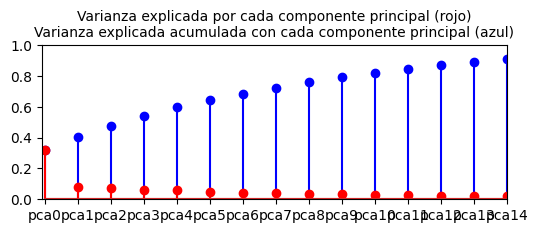

In [148]:
# Visualización del peso de cada columna calculada:

def plot_PCA(pca):
  plt.stem(pca.explained_variance_ratio_.cumsum(),'b')
  plt.stem(pca.explained_variance_ratio_,'r')

  titleStr = 'Varianza explicada por cada componente principal (rojo)'
  titleStr = titleStr+'\n'
  titleStr = titleStr+'Varianza explicada acumulada con cada componente principal (azul)'
  plt.title(titleStr, fontsize=10)
  ax = plt.gca()
  ax.axis([-0.1,1.1,0,1])
  ax.set_xticks([i for i in range(pca.n_components_)])
  ax.set_xticklabels(["pca"+str(i) for i in range(pca.n_components_)])

  fig = plt.gcf()
  fig.set_size_inches(6,2)

  plt.show()

plot_PCA(pca)

In [149]:
# Entrenamos el modelo con X_train_var_filtered:
reg_model_pca = linear_model.LinearRegression()
reg_model_pca.fit(X_train_pca, y_df['class'])

LinearRegression()

`Probar los modelos de clasificación (no de regresión) ya que nos interesa dividir a los pacientes en clases`

In [150]:
# Procesado de los test:

# Ordenar los df por id:
X_test.sort_index(inplace=True)
y_test.sort_index(inplace=True)

N_x_test, D_x_test = X_test.shape
N_y_test, D_y_test = y_test.shape

# Codificación de los datos tipo 'object':
def encode_object_columns(df):
    df_code = df.copy()
    code_to_categ = {}

    for col in df_code.columns:
        if df_code[col].dtype == 'object':
            df_code[col] = df_code[col].astype('category')
            codes = df_code[col].cat.codes.replace(-1, np.nan)  # Reemplaza -1 por NaN
            code_to_categ[col] = dict(zip(codes, df_code[col]))
            df_code[col] = codes

    return df_code, code_to_categ

X_test_df, _ = encode_object_columns(X_test)

#Codificación de los valores de y_test:
y_test_df, _= encode_object_columns(y_test)

# Visualización de valores NaN:
missing_data = X_test_df.isna()

missing_values_per_column = missing_data.sum(axis=0)    # 'NA' por cada columna
missing_values_per_row = missing_data.sum(axis=1)       # 'NA' por cada fila

mask_mayorq0 = missing_values_per_column > 0            # Crea una máscara de Pandas para indicar si hay columnas con NA
mask_mayorq1 = missing_values_per_row > 0               # Crea una máscara de Pandas para indicar si hay filas con NA

missing_count_row = missing_values_per_row.value_counts().sort_index()
missing_count_col = missing_values_per_column.value_counts().sort_index()

# Imputación multivariante de los datos NaN:
test_imputed = imputer.transform(X_test_df)
X_test_df = pd.DataFrame(test_imputed, columns=X_test_df.columns)              # Convertir de nuevo a DataFrame

# Aumento de la dimensionalidad:
degree = 2
interaction_only = True    # Si es 'True' sólo calcula las interacciones entre coumnas diferentes

X_test_dim = polyf.transform(X_test_df)   # Adapta todos los datos a las nuevas características

# Esclalado al intervalo unidad [0, 1]:
X_test_dim_scalerUnit = train_df_scalerUnit.transform(X_test_dim)

# Escalado al máximo de los valores absolutos:
X_test_dim_scalerMaxAbs = train_df_scalerMaxAbs.transform(X_test_dim)

# Estandarización:
X_test_dim_scalerStd = train_df_scalerStd.transform(X_test_dim)

# Filtrado por Varianza:
X_test_var_filtered = selector_var.transform(X_test_dim)

# repetimos el ejemplo pero escalando al intervalo unidad antes del filtrado
X_test_scalerUnit_Var_filtered = selector_scalerUnit.transform(X_test_dim_scalerUnit)

# repetimos el ejemplo pero escalando al max. de los valores absolutos antes del filtrado
X_test_MaxAbs_Var_filtered = selector_MaxAbs.transform(X_test_dim_scalerMaxAbs)

# repetimos el ejemplo pero estandarizando antes del filtrado
X_test_Std_Var_filtered = selector_Std.transform(X_test_dim_scalerStd)

In [151]:
# Estandarizamos primero para PCA:
X_test_df_std = scaler.transform(X_test_df)

# PCA seleccionando diréctamente el número de componentes o un porcentaje de información que queremos mantener:
X_test_pca = pca.transform(X_test_df_std)

In [152]:
# Cálculo de las probabilidades Var:
y_score_var = reg_model_var.predict(X_test_var_filtered)
# Cálculo de la curva ROC y AUC
fpr_var, tpr_var, thresholds_var = roc_curve(y_test_df['class'], y_score_var)
roc_auc_var = auc(fpr_var, tpr_var)

# Cálculo de las probabilidades ScalerUnit:
y_score_scalerUnit = reg_model_scalerUnit.predict(X_test_scalerUnit_Var_filtered)
# Cálculo de la curva ROC y AUC
fpr_scalerUnit, tpr_scalerUnit, thresholds = roc_curve(y_test_df['class'], y_score_scalerUnit)
roc_auc_scalerUnit = auc(fpr_scalerUnit, tpr_scalerUnit)

# Cálculo de las probabilidades MaxAbs:
y_score_MaxAbs = reg_model_MaxAbs.predict(X_test_MaxAbs_Var_filtered)
# Cálculo de la curva ROC y AUC
fpr_MaxAbs, tpr_MaxAbs, thresholds_MaxAbs = roc_curve(y_test_df['class'], y_score_MaxAbs)
roc_auc_MaxAbs = auc(fpr_MaxAbs, tpr_MaxAbs)

# Cálculo de las probabilidades Std:
y_score_Std = reg_model_Std.predict(X_test_Std_Var_filtered)
# Cálculo de la curva ROC y AUC
fpr_Std, tpr_Std, thresholds_Std = roc_curve(y_test_df['class'], y_score_Std)
roc_auc_Std = auc(fpr_Std, tpr_Std)

# Cálculo de las probabilidades
y_score_pca = reg_model_pca.predict(X_train_pca)
# Cálculo de la curva ROC y AUC
fpr_pca, tpr_pca, thresholds = roc_curve(y_df['class'], y_score_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)

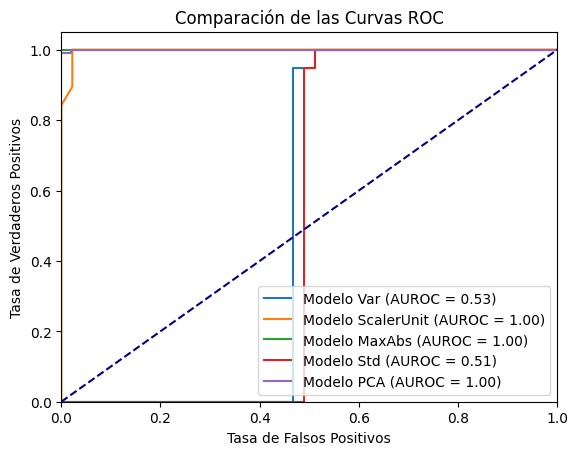

In [154]:
# Visualización de la curva ROC Var:
plt.plot(fpr_var, tpr_var, label='Modelo Var (AUROC = %0.2f)' % roc_auc_var)

# Visualización de la curva ROC ScalerUnit:
plt.plot(fpr_scalerUnit, tpr_scalerUnit, label='Modelo ScalerUnit (AUROC = %0.2f)' % roc_auc_scalerUnit)

# Visualización de la curva ROC MaxAbs:
plt.plot(fpr_MaxAbs, tpr_MaxAbs, label='Modelo MaxAbs (AUROC = %0.2f)' % roc_auc_MaxAbs)

# Visualización de la curva ROC Std:
plt.plot(fpr_Std, tpr_Std, label='Modelo Std (AUROC = %0.2f)' % roc_auc_Std)

# Visualización de la curva ROC PCA:
plt.plot(fpr_pca, tpr_pca, label='Modelo PCA (AUROC = %0.2f)' % roc_auc_pca)

# Curva de no discriminación
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Configuración de los límites del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Etiquetas y título
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de las Curvas ROC')
plt.legend(loc="lower right")

# Mostrar la gráfica
plt.show()